Yogie Wisesa - 1806148851 - AI - Tugas 1

# **Tutorial persiapan data untuk machine learning**


## **Daftar Isi**

1. [**Data hilang**](#missing)
2. [**Rekayasa Fitur**](#fe)
3. [**Menangani Fitur Kategorial**](#catvar)
4. [**Penskalaan Fitur**](#scaler)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib widget
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

### Import CSV menggunakan pd.read_csv. agar address dibaca sebagai text, tambahkan r didepannya sebagai penanda raw

In [15]:
titanic_df = pd.read_csv(r'C:\Users\pc\Downloads\train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Menangani missing value dan outliers <a id="missing"></a>

Untuk mempersiapkan data yang akan digunakan untuk machine learning, tidak boleh ada data yang hilang. Sedangkan data yang ada dari dunia nyata pasti ada yang kosong. Berikut ini cara mencari data yang kosong dari sebuah file.


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


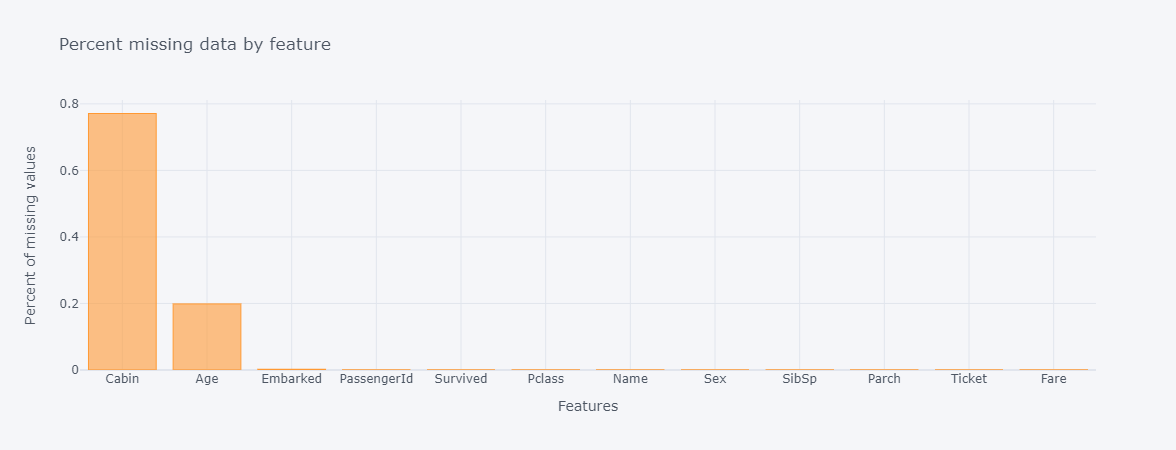

In [16]:
missing_values = draw_missing_data_table(titanic_df)
display(missing_values)
missing_values[['Percent']].iplot(kind='bar', xTitle='Features', yTitle='Percent of missing values', title='Percent missing data by feature')

### Jika data yang hilang cukup banyak, kita dapat mencoba mengisinya dengan value berikut

- jika data yang bilang lebih dari 60%, kita dapat menghilangkan kolom dengan

      titanic_df.drop('Cabin', axis=1, inplace=True)
    
- jika data yang hilang hanya 1 atau 2 saja, maka kita dapat mendelete rownya dengan

      titanic_df['Age'].dropna(inplace=True)
### Sebenarnya lebih baik untuk mempelajari data satu persatu dan mengganti data yang hilang dengan hasil observasi pattern data.

- Data memang sebaiknya tidak hilang tapi lebih baik digantikan dengan median atau mean dari kolom tersebut. Median lebih diproritaskan karena mengandung outlier. berikut ini adalah caranya

      titanic_df['Age'].fillna(titanic_df['Age'].mean(), 1, inplace=True)
      titanic_df['Age'].fillna(titanic_df['Age'].median(), 1, inplace=True)

### Penggantian data yang hilang sangat tergantung dengan data itu sendiri. Kita harus memikirkan cara terbaik untuk mengganti data hilang tersebut. Cobalah beberapa cara dan bandingkan cara mana yang paling efektif. Sekarang kita coba menggunakan data Titanic. 

### Kita akan mencoba mengganti dua data yang hilang di kolom penumpang yang berangkat. Di bawah ini adalah distribusi penumpang berdasarkan tarif dan jenis kelamin. Terdapat dua data yang hilang. Observasi dan pilih data yang sesuai untuk mengisinya.

In [27]:
figure, axes = plt.subplots(1,1,figsize=(20, 8))
plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=titanic_df, palette=('nipy_spectral'), kind="bar", ax=axes)
plt.close(plot.fig)
plt.show()
display(titanic_df[titanic_df['Embarked'].isnull()])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: Could not interpret input 'Embarked'

### Kedua penumpang tersebut ternyata wanita dan tiketnya seharga 80 dollar, dengan kabin dan tiket yang sama. Kemungkinan besar mereka naik dari tempat yang sama. Kemungkinan terbesar mereka berdua naik dari Cherbourg(C). Sekarang kita ganti datanya

In [18]:
titanic_df['Embarked'].fillna('C', inplace=True)

### Pada kolom usia terdapat 177 value yang hilang, sudah terlalu banyak untuk dilihat satu persatu. Pada kasus ini kita gunakan nilai median. Sebenarnya masih ada metode lain yang lebih baik dari median dengan meneliti kolom yang lain.

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

### Lalu yang terakhir adalah kolom kabin. Data yang hilang akan digantikan dengan U atau unknown karena ini hanya sebagai penanda lokasi penumpang.

In [20]:
titanic_df['Cabin'].fillna('U', inplace=True)

In [21]:
draw_missing_data_table(titanic_df[['Cabin', 'Age', 'Embarked']])

,Total,Percent
Cabin,0,0.0
Age,0,0.0
Embarked,0,0.0


dapat dilihat bahwa sekarang sudah tidak ada lagi data yang kosong di dalam csv ini. 

## **2. Pembuatan Fitur** <a id="fe"></a>

### Data yang kita miliki tentunya semakin detail semakin baik. Dengan sedikit penelitian tambahan, kita dapat menambahkan informasi ke data. Misalkan pada kasus ini dengan mencari di Internet kita menemukan bahwa huruf pertama di data kabin menandakan lokasi dek pada kapal. Dengan ini kita dapat menambahkan kolom Deck hanya dengan membaca data yang sudah ada. Berikut adalah beberapa contoh penambahan kolom dari data:

In [22]:
# pembuatan kolom Deck dengan huruf di kolom kabin
titanic_df['Deck'] = titanic_df['Cabin'].str[:1]
titanic_df['Deck'] = titanic_df['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in titanic_df['Cabin']))})

# penambahan kolom Title/gelar dari penumpang
titanic_df['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in titanic_df['Name']), index=titanic_df.index)
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# penambahan kolom Familysize/jumlah anggota keluarga
titanic_df['FamillySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamillySize'][titanic_df['FamillySize'].between(1, 5, inclusive=False)] = 2
titanic_df['FamillySize'][titanic_df['FamillySize']>5] = 3
titanic_df['FamillySize'] = titanic_df['FamillySize'].map({1: 'Alone', 2: 'Medium', 3: 'Large'})

# penambahan kolom IsAlone/apakah sendirian dan kolom IsChild/apakah seorang anak-anak
titanic_df['IsAlone'] = np.where(titanic_df['FamillySize']!=1, 0, 1)
titanic_df['IsChild'] = titanic_df['Age'] < 18
titanic_df['IsChild'] = titanic_df['IsChild'].astype(int)    

### Setelah selesai poenambahan fitur ini, kita bisa menghapus data lama yang dinilai tidak perlu dan tampilkan row pertamanya.

In [23]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], 1)    
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamillySize,IsAlone,IsChild
0,0,3,male,22.0,1,0,7.2500,S,99,Mr,Medium,0,0
1,1,1,female,38.0,1,0,71.2833,C,133,Mrs,Medium,0,0
2,1,3,female,26.0,0,0,7.9250,S,99,Miss,Alone,0,0
3,1,1,female,35.0,1,0,53.1000,S,135,Mrs,Medium,0,0
4,0,3,male,35.0,0,0,8.0500,S,99,Mr,Alone,0,0


## **3. Mengatur fitur kategorial** <a id="catvar"></a>

### Dari dataset diatas kita dapat mengetahui bahwa data tersebut memiliki fitur kategorial. Fitur kategorial adalah kolom yang isinya bukan angka atau value. Fitur kategorial pada data ini adalah jenis kelamin, gelar, jumlah keluarga, dan asal keberangkatan. Kita perlu mengganti fitur ini menjadi numerik atau value agar dapat dimengerti oleh algoritma mesin. 
### Solusinya adalah membuat kode yang menjadi penanda sebuah string. Kode ini bernama label encoding. ini dapat dilakukan menggunakan class LabelEncoder di modul python scikit learn atau map method dalam pandas dataframe. Misalkan kita buat kolom keberangkatan dilabeli menjadi angka seperti dibawah ini:

 - Keberangkatan dari Cherbourg diganti dengan angka 1
 - Keberangkatan dari Southampton diganti dengan angka 2
 - Keberangkatan dari Queenstown diganti dengan angka 3

### Tapi metode ini memiliki kelemahan yaitu algoritma bisa saja menganggap kolom ini sebagai ranking. Terdapat solusi lain yaitu menggunakan hot-one encoding. Hot-one encoding menggunakan kolom sebagai penggantinya. Jadi akan dibuat tiga kolom yaitu Embarked_C untuk keberangkatan dari Cherbourg, kolom Embarked_S untuk keberangkatan dari Southampton, dan kolom Embarked_Q untuk keberangkatan dari Queenstown. Penumpang yang berangkat dari kota terkait akan mendapat nilai 1 dan 0 untuk sisanya.

![](https://www.renom.jp/notebooks/tutorial/preprocessing/category_encoding/renom_cat_onehot.png)

### Namun cara ini juga memiliki kelemahan yaitu jadi terdapat kolom yang tidak terpakai, karena akan ada dua kolom yang nilainya kosong. Untuk menghindari hal ini salah satu kolom harus dihapus dan dibuat dummy variable trap.

*Catatan: Hot-one encoding biasanya bekerja dengan baik namun tetap tergantung pada data yang digunakan. Jangan ragu untuk menggunakan cara ini.*

### Dalam Python kita dapat dengan mudah mengimplementasikan hot-one encoding dengan menggunakan fungsi pandas get_dummies yang secara otomatis membuat hot-one encoding untuk seluruh fitur kategorial pada data. Lalu kita cukup menambahkan argumen drop_first = True untuk menghapus kolom untuk dummy variable.

In [24]:
titanic_df = pd.get_dummies(data=titanic_df, drop_first=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamillySize_Large,FamillySize_Medium
0,0,3,22.0,1,0,7.2500,99,0,0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,133,0,0,0,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,99,0,0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,135,0,0,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,99,0,0,1,0,1,0,1,0,0,0,0


## **4. Penskalaan Fitur** <a id="scaler"></a>

### Kita perlu melakukan normalisasi data karena jika tidak datayang besar dan heterogen dapat memicu gradien yang besar sehingga kemungkinan gradien tersebut turun akan kecil. Mari kita lihat range value dari data kita.

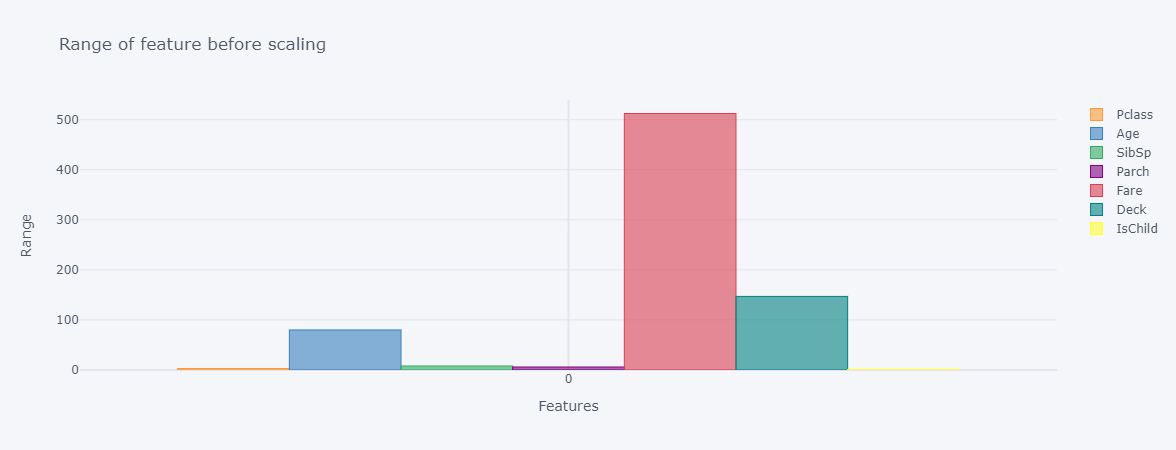

In [25]:
ranges = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'IsChild']].max().to_frame().T
ranges.iplot(kind='bar', xTitle='Features', yTitle='Range', title='Range of feature before scaling')

### Range yang dimiliki data ini sangat heterogen. Dengan melakukan penskalaan maka mean kolom akan menjadi 0 dan variance menjadi 1. Dalam python kita cukup menggunakan class StandardScaler di dalam modul scikit-learn.

In [26]:
X = titanic_df.drop(['Survived'], 1)
y = titanic_df['Survived']

# Feature scaling of our data
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Deck,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamillySize_Large,FamillySize_Medium
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.271586,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,1.432260
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.756144,0.0,-0.381109,-1.355574,-0.307562,-1.614710,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.271586,0.0,-0.381109,-1.355574,-0.307562,0.619306,1.953514,-1.175735,-0.405840,-0.162781,-0.235981,-0.698197
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.843471,0.0,-0.381109,-1.355574,-0.307562,0.619306,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.271586,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,-0.698197


### Dengan ini data sudah siap untuk digunakan machine learning.